Coding a unsupervised model to identify customers with similar behaviors

In [41]:
# Importing necessary librarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [42]:
# Importing train dataset and taking a first look at it
dataset = pd.read_csv(r'mall_customers.csv')

dataset.info() # There is no column with na values, but there is a object column (Genre), so we need to use LabelEncoder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [43]:
# Taking a look at the first lines of the dataset
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
# Encoding
encoder = LabelEncoder()

dataset['Genre'] = encoder.fit_transform(dataset['Genre'])

In [45]:
# Choosing the columns to use in KMeansClustering
X = dataset[['Annual Income (k$)','Spending Score (1-100)']]

# Creating an instance of StandardScaler. This preprocessing method is important once it doens't let the model
  # be influenced too much by variables that may have a large weight, just because its value is too big
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

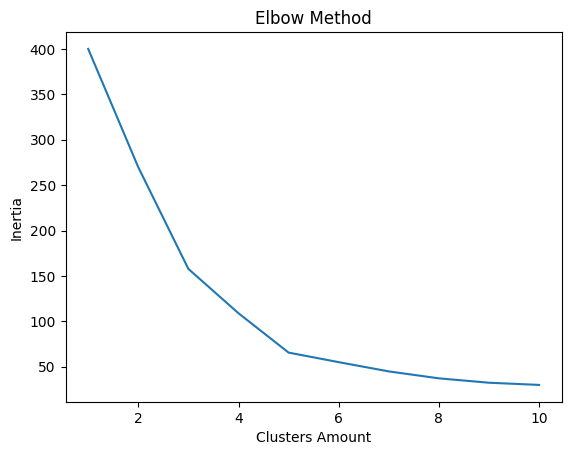

In [46]:
# Choosing the number of clusters using the Elbow method
inertia = []

for i in range(1,11):
  km = KMeans(n_clusters=i, random_state=42, n_init=10)
  km.fit(X_scaled)
  inertia.append(km.inertia_)

# Plot of Elbow Method
plt.plot(range(1,11), inertia)
plt.title('Elbow Method')
plt.xlabel('Clusters Amount')
plt.ylabel('Inertia')
plt.show()

Training model with ideal number of clusters

In [47]:
# Choosing 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

In [48]:
# Adding the clustering results to dataset
dataset['Cluster'] = y_kmeans
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


Visualizing Clusters

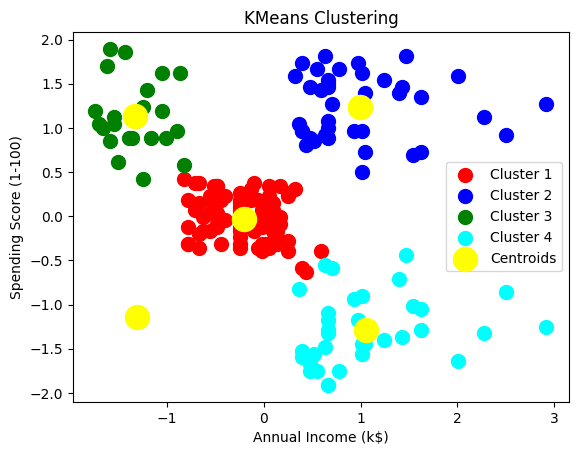

In [49]:
# Ploting the graph
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()